In [118]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from autograd import grad 
from autograd import hessian
import math
import copy
import pandas as pd
import sys
import time
from IPython.display import clear_output
import os


In [119]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [120]:
def softmax(w,x,y):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

In [121]:
def multiclass_perceptron(w,x,y):      
    # pre-compute predictions on all points
    all_evals = model(x,w) #classes x number_of_data
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)  

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    
    cost = np.sum(a - b)
    #add regularizer
    #lam = 10**(-5)
    #cost = cost + lam*np.linalg.norm(w[1:,:], 'fro')**2

    # return average
    return cost/float(np.size(y))

In [122]:
def plot_OVA(minx, maxx, last_weights, data, col_C, num_classes, title):
    x_min = minx-0.1; x_max = maxx+0.1
    r = np.linspace(x_min,x_max,1000)
    w1_vals,w2_vals = np.meshgrid(r,r)
    w1_vals.shape = (len(r)**2,1)
    w2_vals.shape = (len(r)**2,1)
    o = np.ones((len(r)**2,1))
    h = np.concatenate([o,w1_vals,w2_vals],axis = 1) #create 3 columns
    #pts = np.dot(h,last_weights) #shape(r^2,classes) #performs matrix multiplications on 2D arrays
    pts = np.dot(last_weights, h.T)
    #g_vals = np.argmax(pts,axis = 1)
    g_vals = np.argmax(pts,axis = 0) 
    
    w1_vals.shape = (len(r),len(r))
    w2_vals.shape = (len(r),len(r))
    g_vals.shape = (len(r),len(r))
    
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(10, 5))
    for a in range(0,num_classes):
        # get current weights
        #w = last_weights.T[a]
        w = last_weights[a]
        # draw subproblem separator
        z = - w[0]/w[2] - w[1]/w[2]*r
        #r = np.linspace(minx-0.1,maxx+0.1,1000)
        ax1.plot(r,z,linewidth = 2,zorder = 3)
        ax1.plot(r,z,linewidth = 2.75,color = 'k',zorder = 2)
    ax1.scatter(data['X1'],data['X2'],c= col_C, s=100, edgecolors='k')
    ax1.contourf(w1_vals,w2_vals,g_vals+1,levels = range(0,num_classes+1), alpha=0.1, colors = ['blue', 'red', 'green', 'black', 'yellow'])
    ax1.set_xlim(x_min,x_max)
    ax1.set_ylim(x_min,x_max)
    ax1.set_title(title,fontsize=16)
    ax1.set_xlabel('X1', fontsize = 12)
    ax1.set_ylabel('X2', fontsize = 12)
    ax2.contour(w1_vals,w2_vals,g_vals+1,colors = 'k',levels = range(0,num_classes+1),linewidths = 2.75,zorder = 4) #right hand side plot
    ax2.scatter(data['X1'],data['X2'],c= col_C, s=100, edgecolors='k')
    ax2.set_title(title,fontsize=16)
    ax2.set_xlabel('X1', fontsize = 12)
    ax2.set_ylabel('X2', fontsize = 12)
    ax2.contourf(w1_vals,w2_vals,g_vals+1,levels = range(0,num_classes+1), alpha=0.1, colors = ['blue', 'red', 'green', 'black', 'yellow'])
    plt.show()

In [123]:
def plot_multi_class(minx, maxx, last_weights, data, col_C, num_classes, title):
    x_min = minx-0.1; x_max = maxx+0.1
    r = np.linspace(x_min,x_max,1000)
    w1_vals,w2_vals = np.meshgrid(r,r)
    w1_vals.shape = (len(r)**2,1)
    w2_vals.shape = (len(r)**2,1)
    o = np.ones((len(r)**2,1))
    h = np.concatenate([o,w1_vals,w2_vals],axis = 1) #create 3 columns
    pts = np.dot(h,last_weights) #shape(r^2,classes) #performs matrix multiplications on 2D arrays
    #pts = np.dot(last_weights, h.T)
    g_vals = np.argmax(pts,axis = 1)
    #g_vals = np.argmax(pts,axis = 0) 
    
    w1_vals.shape = (len(r),len(r))
    w2_vals.shape = (len(r),len(r))
    g_vals.shape = (len(r),len(r))
    
    fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(10, 5))
    for a in range(0,num_classes):
        # get current weights
        w = last_weights.T[a]
        #w = last_weights[a]
        # draw subproblem separator
        z = - w[0]/w[2] - w[1]/w[2]*r
        #r = np.linspace(minx-0.1,maxx+0.1,1000)
        ax1.plot(r,z,linewidth = 2,zorder = 3)
        ax1.plot(r,z,linewidth = 2.75,color = 'k',zorder = 2)
    ax1.scatter(data['X1'],data['X2'],c= col_C, s=100, edgecolors='k')
    ax1.contourf(w1_vals,w2_vals,g_vals+1,levels = range(0,num_classes+1), alpha=0.1, colors = ['blue', 'red', 'green', 'black', 'yellow'])
    ax1.set_xlim(x_min,x_max)
    ax1.set_ylim(x_min,x_max)
    ax1.set_title(title,fontsize=16)
    ax1.set_xlabel('X1', fontsize = 12)
    ax1.set_ylabel('X2', fontsize = 12)
    ax2.contour(w1_vals,w2_vals,g_vals+1,colors = 'k',levels = range(0,num_classes+1),linewidths = 2.75,zorder = 4) #right hand side plot
    ax2.scatter(data['X1'],data['X2'],c= col_C, s=100, edgecolors='k')
    ax2.set_title(title,fontsize=16)
    ax2.set_xlabel('X1', fontsize = 12)
    ax2.set_ylabel('X2', fontsize = 12)
    ax2.contourf(w1_vals,w2_vals,g_vals+1,levels = range(0,num_classes+1), alpha=0.1, colors = ['blue', 'red', 'green', 'black', 'yellow'])
    plt.show()

In [132]:
## This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,max_its,w, data, labels, alpha_choice = 'diminishing',inputs_flag = False ):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        if (inputs_flag == True):
            cost_eval,grad_eval = gradient(w,data,labels)
        else:
            cost_eval,grad_eval = gradient(w)
            
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    if (inputs_flag == True):
        cost_history.append(g(w,data,labels))
    else:
        cost_history.append(g(w))  
    return weight_history,cost_history

In [125]:
import autograd.numpy as np
from autograd import value_and_grad 
from autograd import hessian
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad
from autograd import hessian as compute_hess

def newtons_method(g,max_its,w,epsilon, x, labels):        
    # create gradient and hessian functions
    #self.g = g
    
    # flatten gradient for simpler-written descent loop
    flat_g, unflatten, w = flatten_func(g, w)
    
    grad = compute_grad(flat_g)
    hess = compute_hess(flat_g)
    
    # create container for weight history 
    w_hist = []
    cost_history = []
    w_hist.append(unflatten(w))
        
    geval_old = flat_g(w,x,labels)
    
    for k in range(max_its):
        # compute gradient and hessian
        grad_val = grad(w,x,labels)
        hess_val = hess(w,x,labels)
        hess_val.shape = (np.size(w),np.size(w))

        # solve linear system for weights
        w = w - np.dot(np.linalg.pinv(hess_val + epsilon*np.eye(np.size(w))),grad_val)
                
        # eject from process if reaching singular system
        geval_new = flat_g(w,x,labels)
        if k > 2 and geval_new > geval_old:
            print ('singular system reached')
            time.sleep(1.5)
            clear_output()
            return w_hist
        else:
            geval_old = geval_new
            
        # record current weights
        w_hist.append(unflatten(w))
    
    return w_hist

In [126]:
def multiclass_softmax(w,x,y):
    lam = 10**(-5)        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    #print(lam)
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

In [127]:
grandparent_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
directory_path = os.path.join(grandparent_path,'ee499_ml_spring23')
readDataPath = os.path.join(directory_path,'readData')
filepath = os.path.join(readDataPath,'5class_data.csv')
#readDataPath = './readData/'
#sys.path.append('./')
data = np.loadtxt(filepath,delimiter = ',')

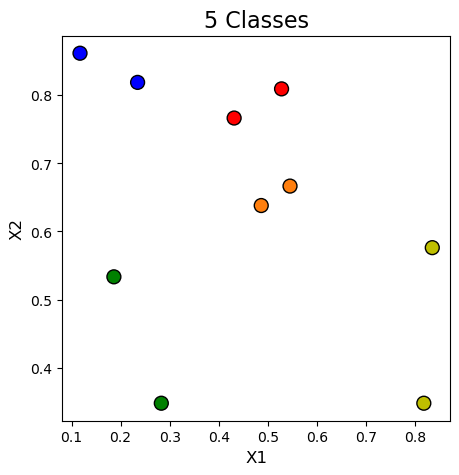

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_Class5 = np.loadtxt(filepath,delimiter = ',')
data_Class5 = data_Class5[:,[1,2,11,12,20,21,32,31,40,41]]
df_Class5 = pd.DataFrame({'X1': data_Class5[0],'X2': data_Class5[1], 'Label': data_Class5[2]})
col_5C = np.where(df_Class5['Label']==0,'b',np.where(df_Class5['Label']==1,'r',np.where(df_Class5['Label']==2,'g', np.where(df_Class5['Label']==3, 'C1', 'y'))))
ax.scatter(df_Class5['X1'],df_Class5['X2'],c= col_5C, s=100, edgecolors='k')
ax.set_title('5 Classes',fontsize=16)
ax.set_xlabel('X1', fontsize = 12)
ax.set_ylabel('X2', fontsize = 12)
plt.show()

In [129]:
x = data_Class5[:-1]
minx = min(min(x[0,:]),min(x[1,:]))
maxx = max(max(x[0,:]),max(x[1,:]))
y_labels = copy.deepcopy(data_Class5[-1])
num_classes = np.size(np.unique(y_labels))
print("number of classes: ", num_classes)

number of classes:  5


In [137]:
max_its_set = 1; epsilon_choice = 10**(-5)
#shape of w should be [w0, w1, w2] since this is a line
weight_histories = []
for c in range(0,num_classes):
    y_temp = copy.deepcopy(y_labels)
    ind = np.argwhere(y_temp == (c))
    ind = ind[:,0]
    ind2 = np.argwhere(y_temp != (c))
    ind2 = ind2[:,0]
    y_temp[ind] = 1
    y_temp[ind2] = -1
    
    epsilon = epsilon_choice
    max_its = max_its_set;
    w = np.random.randn(np.shape(x)[0]+1,1);
    #run gradient descent and Newton's method and solve the current subproblem
    #cost = softmax;
    cost = multiclass_perceptron
    weight_history = 0; cost_history = 0;
    weight_history = gradient_descent(g = cost,max_its = max_its,w = w, data = x, labels = y_temp, inputs_flag=True)

    #weight_history = newtons_method(cost,max_its,w, epsilon, x, y_temp)
    #weight_histories.append(copy.deepcopy(weight_history)) #length of list equal to #classes, each item has length max_its+1
    
    
    g_count = []
    for j in range(len(weight_history)):
        weight = weight_history[j]
        gval = cost(weight,x,y_temp)
        g_count.append(gval)
    ind = np.argmin(g_count)
    weight = weight_history[ind]
    # normalize normal vectors for each classifier
    w_norm = sum([v**2 for v in weight[1:]])**(0.5)
    w_1N = [v/w_norm for v in weight]
    weight_histories.append(w_1N)
    
weight_histories = np.array(weight_histories)
weight_histories.shape = (num_classes, np.shape(x.T)[1] + 1)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
last_weights = weight_histories

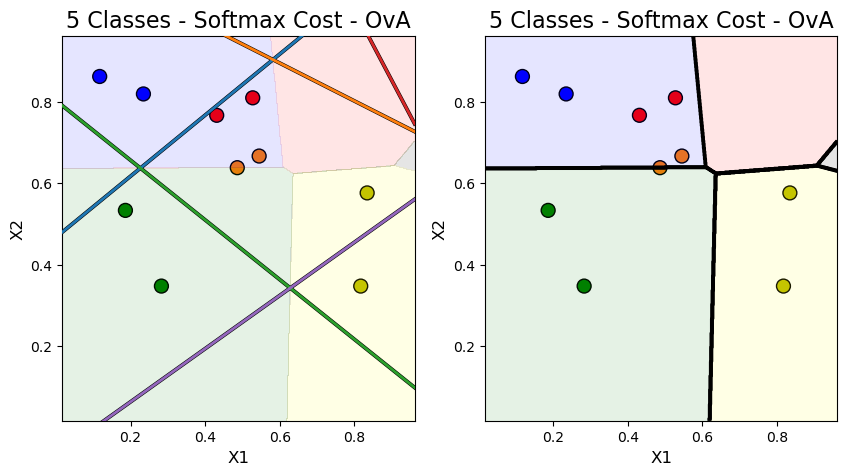

In [117]:
plot_OVA(minx, maxx, last_weights, df_Class5, col_5C, num_classes, title = '5 Classes - Softmax Cost - OvA')

In [71]:
g = multiclass_softmax; w = 0.1*np.random.randn(3,num_classes); max_its = 5; epsilon_choice = 10**-7
weight_history = newtons_method(g,max_its,w, epsilon_choice, x, y_labels)

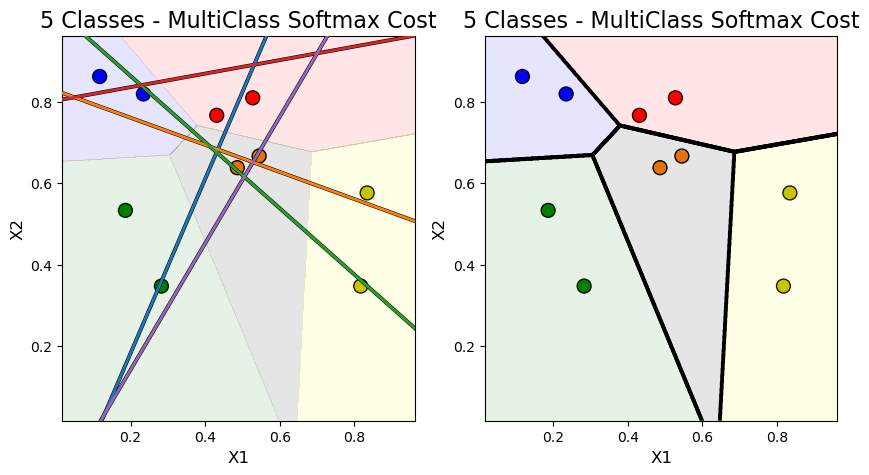

In [72]:
last_weights = weight_history[-1]
plot_multi_class(minx, maxx, last_weights, df_Class5, col_5C, num_classes, title = '5 Classes - MultiClass Softmax Cost')